# COGS 108 - Factors affecting vehicle fatalities

# Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

# Names

- Vivin Vinil
- AJ Sangle
- Nikhil Patel
- Liopold Chen
- Travis Gillespie

# Abstract

During our initial brainstorming session, one group member shared insights from a high school project on factors leading to accidents among student drivers, sparking our interest in expanding this analysis to the general population. This curiosity led us to explore the specific factors affecting fatality rates in motorist accidents, such as time of day, vehicle type, and driver behavior. Our research revealed a gap in existing studies, which often overlook the granularity of these factors. Motivated by the need for detailed information that could inform targeted interventions by transportation authorities, we embarked on a comprehensive analysis using a dataset of police-reported vehicle accidents in New York City.

This study investigates the variables that affect driver mortality rates in collisions, with a particular emphasis on the kind of vehicle, accident cause, and time of day. By using a dataset of car accidents in New York City that police have reported, the study explores the subtleties of how particular factors affect the number of fatalities among drivers and pedestrians. Preliminary research highlights the increased risks related to driving at night, which is supported by the National Safety Council's focus on the increased risks associated with night driving because of things like reduced vision and fatigued drivers. Additionally, the report notes significant differences in the death rates of other vehicle categories, with commercial vehicles and motorbikes having higher death rates while sedans and SUVs are more frequently involved in accidents. The analysis goes further to pinpoint the most frequently seen combination of variables in fatal accidents, including vehicle type, contributing factors like speeding and distracted driving, and the time of day. This illustrates a complex interaction that may help develop safer urban transportation policies.

On the whole, our findings indicate that sedans and SUVs are predominantly involved in fatal accidents, with speeding and driver inattention as leading contributing factors. The study also reveals a bimodal distribution of fatalities related to the total vehicle count in accidents, suggesting higher risks in single-vehicle incidents and a rising trend with increasing vehicle involvement. This nuanced understanding of accident fatality dynamics could serve as a valuable resource for policymakers and urban planners aiming to enhance road safety and reduce accident fatalities.


# Research Question

What specific factors - such as time of day, vehicle type and cause of accident - affect fatality rates within motorist accidents, for both motorists and pedestrians? Are there any particular trends in these factors that can be related to fatality?

## Background and Prior Work

Since the inception of the modern automobile, urban transportation safety has been a growing concern for citizens and policymakers alike. Several factors contribute to the safety of motorists on the road, as well as pedestrians who come in contact with them, including vehicle type, time of day, and driver-related factors.

The National Safety Council highlights the dangers of driving at night specifically, due to the combined factors of compromised night vision, driver fatigue, rush hour, and impaired drivers.<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1) A 2018 study in the Journal of Transport & Health discussed fatality rates for drivers, cyclers, and other road users in Great Britain. They concluded that fatality rates, although indeed higher for drivers than for cyclers, that information is not enough to portray the full impact of driving.<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2)

The main limitation of the studies we looked through is that they do not go into the specific details of each factor discussed. There is not enough data regarding the exact vehicle type (sedan, minivan, SUV, truck, e-bike, moped, etc.) involved in a crash. Studies also overwhelmingly focus on *only* the drivers involved in a crash, not any of the other outside parties involved (like pedestrians). Overall, there seems to be a dire need for truly detailed information about traffic accidents.

Although our research question seems to be answered by the studies above, there has yet to be a centralized perspective of the main factors influencing motorist and pedestrian safety in an urban environment. One would have to synthesize several sources (like we just did) to come to the same conclusion; there is an opportunity here to create a "one-stop-shop" for general inquiries about urban transportation safety. The key observation we made from past studies is that the specificity of vehicle type and the number of contributing factors considered has been limited. We want this analysis to be useful to someone looking to make specific changes to rules/regulations pertaining to specific vehicle types or driver-related factors. Hence, we will embrace the details: we will analyze the 10 most common specific vehicle types involved in accidents as well as the top 10 most common contributing factors (these could be driver or non driver related). Moreover, we will go into detail about how these two factors intertwine with time of day and each other. We will try to analyze things like the most fatal combinations of these three features. Our work aims to offer a novel conclusion in this space by increasing the depth of analysis of these individual features, and include multiple types for each feature.

1. <a name="cite_note-1"></a> [^](#cite_ref-1) “The Most Dangerous Time to Drive.” *National Safety Council* . Accessed 11 Feb. 2024. www.nsc.org/road/safety-topics/driving-at-night

2. <a name="cite_note-2"></a> [^](#cite_ref-2) Scholes, Shaun, et al. ‘Fatality Rates Associated with Driving and Cycling for All Road Users in Great Britain 2005–2013’. *Journal of Transport & Health*, vol. 8, 2018, pp. 321–333, https://doi.org10.1016/j.jth.2017.11.143.

# Hypothesis


Based on our prior intuition/knowledge, we feel that the time of day and the type of vehicle involved contribute most to fatality rates during accidents. We also believe that in cases where pedestrians are involved, the fatality rate is a significantly higher for them.

# Data

## Data overview

- Dataset #1
  - Dataset Name: Motor_Vehicle_Collisions_-_Crashes
  - Link to the dataset: https://www.kaggle.com/datasets/muzammilrizvi1/motor-vehicle-collisions-crashes?resource=download
  - Number of observations: 1972121
  - Number of variables: 29

This dataset describes police reported vehicle accidents in New York City. The most important variables are PERSONS INJURED and PERSONS KILLED which are integers, VEHICLE TYPE CODE 1, CONTRIBUTING FACTOR VEHICLE 1 and finally, CRASH DATE and CRASH TIME which are datetime objects. 

For the bulk of our analysis, we will be dropping the columns CONTRIBUTING FACTOR VEHICLE 2-5 and VEHICLE TYPE CODE 2-5, and only keeping CONTRIBUTING FACTOR VEHICLE 1 and VEHICLE TYPE CODE 1. This is because not all collisions will have 2 or more vehicles involved, so constricting our analysis to the main vehicle at fault ensures that all types of collisions are accounted for. As noted later on in the comments of our code, we'll make an initial copy of our dataset before dropping these columns, as a portion of our EDA requires the information from multiple vehicles. 

In all, this will reduce the number of observations to 1 million for the bulk of our analysis, making our analysis more manageable.  

## Dataset Motor Vehicle Collisions - Crashes

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set()
sns.set_context('talk')

import warnings
warnings.filterwarnings('ignore')

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes.csv',low_memory=False)

# Drop columns we do not need for our analysis. These columns provide unneeded information that do not directly correlate with our research question.
df = df.drop(columns=['BOROUGH','ZIP CODE','LATITUDE','LONGITUDE','LOCATION','OFF STREET NAME','CROSS STREET NAME'])
df = df.set_index('COLLISION_ID').reset_index()  # Bring COLLISION_ID column to front 
# To reduce column name length, remove "Number of" from each column that contains it
df = df.rename(columns={'NUMBER OF PERSONS INJURED':"PERSONS INJURED","NUMBER OF PERSONS KILLED":"PERSONS KILLED",
                      'NUMBER OF PEDESTRIANS INJURED':"PEDESTRIANS INJURED",'NUMBER OF PEDESTRIANS KILLED':'PEDESTRIANS KILLED',
                       "NUMBER OF CYCLIST INJURED":"CYCLIST INJURED","NUMBER OF CYCLIST KILLED":"CYCLIST KILLED",
                      "NUMBER OF CYCLIST INJURED":"CYCLIST INJURED","NUMBER OF MOTORIST INJURED":"MOTORIST INJURED",
                      "NUMBER OF MOTORIST KILLED":"MOTORIST KILLED"})

# Ensure that all data points have at least one vehicle, street name, and contributing factor attached to it
df = df[df['ON STREET NAME'].isna() == False]  # Decreased data from 1.9 million rows to about 1.5 million
df = df[df['VEHICLE TYPE CODE 1'].isna() == False]  # Decreased data by a few thousand
df = df[df['CONTRIBUTING FACTOR VEHICLE 1'] != 'Unspecified']  # Decreased data from 1.5 million rows to about 1 million
df["CRASH DATE"] = pd.to_datetime(df["CRASH DATE"], format="%m/%d/%Y")  # Change Date column to datetime objects
df["CRASH TIME"] = pd.to_datetime(df["CRASH TIME"], format="%H:%M").dt.time  # Change Time column to datetime objects
df = df.reset_index(drop=True)

total_df = df.copy()
# As stated above, most of our analysis will only use CONTRIBUTING FACTOR VEHICLE 1. However one section will need all factors later on, which is what
# this copy is for.

df

,COLLISION_ID,CRASH DATE,CRASH TIME,ON STREET NAME,PERSONS INJURED,PERSONS KILLED,PEDESTRIANS INJURED,PEDESTRIANS KILLED,CYCLIST INJURED,CYCLIST KILLED,...,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,4455765,2021-09-11,02:39:00,WHITESTONE EXPRESSWAY,2.0,0.0,0,0,0,0,...,Aggressive Driving/Road Rage,Unspecified,NaN,NaN,NaN,Sedan,Sedan,NaN,NaN,NaN
1,4513547,2022-03-26,11:45:00,QUEENSBORO BRIDGE UPPER,1.0,0.0,0,0,0,0,...,Pavement Slippery,NaN,NaN,NaN,NaN,Sedan,NaN,NaN,NaN,NaN
2,4541903,2022-06-29,06:55:00,THROGS NECK BRIDGE,0.0,0.0,0,0,0,0,...,Following Too Closely,Unspecified,NaN,NaN,NaN,Sedan,Pick-up Truck,NaN,NaN,NaN
3,4486555,2021-12-14,17:05:00,BROOKLYN QUEENS EXPRESSWAY,0.0,0.0,0,0,0,0,...,Passing Too Closely,Unspecified,NaN,NaN,NaN,Sedan,Tractor Truck Diesel,NaN,NaN,NaN
4,4486519,2021-12-14,14:58:00,3 AVENUE,0.0,0.0,0,0,0,0,...,Passing Too Closely,Unspecified,NaN,NaN,NaN,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011771,4608783,2023-02-25,17:30:00,DECATUR AVENUE,1.0,0.0,0,0,0,0,...,Alcohol Involvement,Unspecified,NaN,NaN,NaN,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1011772,4608502,2023-02-25,17:22:00,BOSTON ROAD,1.0,0.0,0,0,0,0,...,Unsafe Lane Changing,Other Vehicular,NaN,NaN,NaN,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1011773,4608589,2023-02-25,00:20:00,JEROME AVENUE,0.0,0.0,0,0,0,0,...,Passing Too Closely,Unspecified,NaN,NaN,NaN,Sedan,NaN,NaN,NaN,NaN
1011774,4608654,2023-02-25,04:00:00,FDR DRIVE,0.0,0.0,0,0,0,0,...,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,Sedan,Sedan,NaN,NaN,NaN


As indicated in our proposal, a key challenge we face is a variety of entries for vehicles 2, 3, 4, and 5 which are empty. This makes it more challenging to analyze contributing factors and vehicle types. Hence, we are going to simplify the data set to include only the 'vehicle of interest'; i.e, the column with maximum non-null entries to allow for some broader inferences. It also allows us to focus on more vehicle types and contributing factors by eliminating the data for multi-vehicle crashes. 

It seems like "CONTRIBUTING FACTOR VEHICLE 1" has the least NaN values and thus Vehicle 1 will be our vehicle of interest, but we should test this to make sure. To do so, we want to check if "CONTRIBUTING FACTOR VEHICLE 1" has all the same values as any of the other columns. We also want to check how many values are in "CONTRIBUTING FACTOR VEHICLE 1" in comparison to the rest of the columns. If "CONTRIBUTING FACTOR VEHICLE 1" has less NaN values than the rest and all the same unique values, then we can safely assume "CONTRIBUTING FACTOR VEHICLE 1" is the column that describes the main car at fault.

In [3]:
num1 = df["CONTRIBUTING FACTOR VEHICLE 1"].count()
num2 = df["CONTRIBUTING FACTOR VEHICLE 2"].count()
num3 = df["CONTRIBUTING FACTOR VEHICLE 3"].count()
num4 = df["CONTRIBUTING FACTOR VEHICLE 4"].count()
num5 = df["CONTRIBUTING FACTOR VEHICLE 5"].count()

print("Number of non-nan values in CONTRIBUTING FACTOR VEHICLE 1: " + str(num1))
print("Number of non-nan values in CONTRIBUTING FACTOR VEHICLE 2: " + str(num2))
print("Number of non-nan values in CONTRIBUTING FACTOR VEHICLE 3: " + str(num3))
print("Number of non-nan values in CONTRIBUTING FACTOR VEHICLE 4: " + str(num4))
print("Number of non-nan values in CONTRIBUTING FACTOR VEHICLE 5: " + str(num5))

Number of non-nan values in CONTRIBUTING FACTOR VEHICLE 1: 1009629
Number of non-nan values in CONTRIBUTING FACTOR VEHICLE 2: 915190
Number of non-nan values in CONTRIBUTING FACTOR VEHICLE 3: 77998
Number of non-nan values in CONTRIBUTING FACTOR VEHICLE 4: 17480
Number of non-nan values in CONTRIBUTING FACTOR VEHICLE 5: 4725


So, "CONTRIBUTING FACTOR VEHICLE 1" has the least NaN values. Now let's check the set of unique values in each column and compare them to the unique values of "CONTRIBUTING FACTOR VEHICLE 1".

In [4]:
unique1 = df["CONTRIBUTING FACTOR VEHICLE 1"].unique()
unique2 = df["CONTRIBUTING FACTOR VEHICLE 2"].unique()
unique3 = df["CONTRIBUTING FACTOR VEHICLE 3"].unique()
unique4 = df["CONTRIBUTING FACTOR VEHICLE 4"].unique()
unique5 = df["CONTRIBUTING FACTOR VEHICLE 5"].unique()

print("Difference between unique2 and unique 1: " + str(list(set(unique2) - set(unique1))))
print("Difference between unique3 and unique 1: " + str(list(set(unique3) - set(unique1))))
print("Difference between unique4 and unique 1: " + str(list(set(unique4) - set(unique1))))
print("Difference between unique5 and unique 1: " + str(list(set(unique5) - set(unique1))))

Difference between unique2 and unique 1: ['Unspecified']
Difference between unique3 and unique 1: ['Unspecified']
Difference between unique4 and unique 1: ['Unspecified']
Difference between unique5 and unique 1: ['Unspecified']


This tells us that the only difference between "CONTRIBUTING FACTOR VEHICLE 1" and any of the other columns is the value, "Unspecified." Since we took out all rows with "Unspecified" in the "CONTRIBUTING FACTOR VEHICLE 1" column, this makes sense. Thus, each of the "CONTRIBUTING FACTOR" columns have the same unique values.

It is clear from the values above that Vehicle Type 1 has the maximum involvement in each accident, regardless of the other vehicles. More importantly there are multiple accidents which will not have 2+ vehicles. Therefore, it makes sense to analyze this accident data using only Vehicle 1 which is the vehicle of interest in each accident and has the maximum entries across the columns. So, we will drop contributing factors and vehicle types for vehicles which were not of primary interest. 

In [5]:
df = df.drop(['CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5','VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3',
       'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],axis=1)
df

,COLLISION_ID,CRASH DATE,CRASH TIME,ON STREET NAME,PERSONS INJURED,PERSONS KILLED,PEDESTRIANS INJURED,PEDESTRIANS KILLED,CYCLIST INJURED,CYCLIST KILLED,MOTORIST INJURED,MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,VEHICLE TYPE CODE 1
0,4455765,2021-09-11,02:39:00,WHITESTONE EXPRESSWAY,2.0,0.0,0,0,0,0,2,0,Aggressive Driving/Road Rage,Sedan
1,4513547,2022-03-26,11:45:00,QUEENSBORO BRIDGE UPPER,1.0,0.0,0,0,0,0,1,0,Pavement Slippery,Sedan
2,4541903,2022-06-29,06:55:00,THROGS NECK BRIDGE,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Sedan
3,4486555,2021-12-14,17:05:00,BROOKLYN QUEENS EXPRESSWAY,0.0,0.0,0,0,0,0,0,0,Passing Too Closely,Sedan
4,4486519,2021-12-14,14:58:00,3 AVENUE,0.0,0.0,0,0,0,0,0,0,Passing Too Closely,Sedan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011771,4608783,2023-02-25,17:30:00,DECATUR AVENUE,1.0,0.0,0,0,0,0,1,0,Alcohol Involvement,Sedan
1011772,4608502,2023-02-25,17:22:00,BOSTON ROAD,1.0,0.0,0,0,0,0,1,0,Unsafe Lane Changing,Station Wagon/Sport Utility Vehicle
1011773,4608589,2023-02-25,00:20:00,JEROME AVENUE,0.0,0.0,0,0,0,0,0,0,Passing Too Closely,Sedan
1011774,4608654,2023-02-25,04:00:00,FDR DRIVE,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Sedan


Now we have filtered our dataset to only include the vehicle types and contributing factors for the vehicle of interest. Let's continue looking at the contributing factors to see if there are data we can further clean up. We can start by looking at the values in the "CONTRIBUTING FACTOR VEHICLE 1" column.

In [6]:
df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

CONTRIBUTING FACTOR VEHICLE 1
Driver Inattention/Distraction                           300962
Failure to Yield Right-of-Way                            102125
Following Too Closely                                     92663
Other Vehicular                                           48328
Backing Unsafely                                          45595
Passing or Lane Usage Improper                            42100
Turning Improperly                                        38013
Unsafe Lane Changing                                      34069
Passing Too Closely                                       31240
Fatigued/Drowsy                                           30140
Traffic Control Disregarded                               30062
Driver Inexperience                                       23183
Unsafe Speed                                              19793
Lost Consciousness                                        17691
Reaction to Uninvolved Vehicle                            15815
Alcohol In

There's a few interesting things to note. The values of '1' and '80' are peculiar. Let's see if there's any information we can grab from those rows.


In [7]:
df[df["CONTRIBUTING FACTOR VEHICLE 1"].isin(["1", "80"])]

,COLLISION_ID,CRASH DATE,CRASH TIME,ON STREET NAME,PERSONS INJURED,PERSONS KILLED,PEDESTRIANS INJURED,PEDESTRIANS KILLED,CYCLIST INJURED,CYCLIST KILLED,MOTORIST INJURED,MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,VEHICLE TYPE CODE 1
580007,3428332,2016-03-29,16:14:00,127 AVENUE,0.0,0.0,0,0,0,0,0,0,80,Station Wagon/Sport Utility Vehicle
664553,3424205,2016-04-17,13:15:00,147 AVENUE,1.0,0.0,0,0,0,0,1,0,80,Station Wagon/Sport Utility Vehicle
664762,3425305,2016-04-17,11:50:00,Parsons Blvd,1.0,0.0,0,0,0,0,1,0,80,4 dr sedan
665275,3424288,2016-04-22,09:45:00,116 AVENUE,0.0,0.0,0,0,0,0,0,0,1,Box Truck
666426,3406257,2016-04-21,10:00:00,Williamsburg Bridge,0.0,0.0,0,0,0,0,0,0,80,Dump
667500,3412430,2016-04-20,21:30:00,Major Deegan Expy,0.0,0.0,0,0,0,0,0,0,80,4 dr sedan
667512,3413446,2016-04-18,07:45:00,NEREID AVENUE,0.0,0.0,0,0,0,0,0,0,80,4 dr sedan
668049,3413800,2016-04-21,16:25:00,CROTONA AVENUE,0.0,0.0,0,0,0,0,0,0,80,Station Wagon/Sport Utility Vehicle
668267,3414991,2016-04-14,09:45:00,BEDFORD AVENUE,0.0,0.0,0,0,0,0,0,0,1,4 dr sedan
668318,3433679,2016-04-22,15:15:00,Major Deegan Expy,0.0,0.0,0,0,0,0,0,0,80,Station Wagon/Sport Utility Vehicle


While these rows give us other information such as crash date and time, they are of no help in terms of finding contributing factors. Thus, we will remove any rows with contributing factors of '80' and '1'

In [8]:
df = df[df["CONTRIBUTING FACTOR VEHICLE 1"].isin(["1", "80"]) == False]
df = df.reset_index(drop=True)
total_df = total_df[total_df["CONTRIBUTING FACTOR VEHICLE 1"].isin(["1", "80"]) == False]
total_df = total_df.reset_index(drop=True)
df['CONTRIBUTING FACTOR VEHICLE 1'].unique()

array(['Aggressive Driving/Road Rage', 'Pavement Slippery',
       'Following Too Closely', 'Passing Too Closely',
       'Passing or Lane Usage Improper', 'Turning Improperly',
       'Unsafe Lane Changing', 'Unsafe Speed',
       'Reaction to Uninvolved Vehicle', 'Traffic Control Disregarded',
       'Other Vehicular', 'Driver Inattention/Distraction',
       'Alcohol Involvement', 'View Obstructed/Limited',
       'Driver Inexperience', 'Failure to Yield Right-of-Way',
       'Steering Failure', 'Lost Consciousness', 'Brakes Defective',
       'Glare', 'Backing Unsafely', 'Fell Asleep', 'Tinted Windows',
       'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion',
       'Animals Action', 'Pavement Defective', 'Other Lighting Defects',
       'Obstruction/Debris', 'Oversized Vehicle', 'Illnes',
       'Driverless/Runaway Vehicle', 'Passenger Distraction',
       'Tire Failure/Inadequate', 'Headlights Defective', nan,
       'Failure to Keep Right', 'Physical Disability',
       '

Now, the values "1" and "80" are no longer there. Other things that are interesting are the similarities of some values. For example, we can assume values with "Illnes" and "Illness" are meant to be the same. Other similar values are: "Drugs (illegal)" and "Drugs (Illegal)", "Cell Phone (hand-Held)" and "Cell Phone (hand-held)", and "Reaction to Uninvolved Vehicle" and "Reaction to Other Uninvolved Vehicle". We can write a function to standardize these values so that they are the same.

In [9]:
def standardize_contributing_factor(s):
    # in case s is nan, then we must try to strip s
    # if exception is returned, s in nan and we can return s as is
    # otherwise, s is a string and can continue the standardization process
    try:
        s = s.strip()  # strip leading/trailing spaces from s
    except:
        return s
    
    if s == "Illnes":  # correct "Illnes" typo
        s = "Illness"
    elif s == "Reaction to Uninvolved Vehicle":  # change to "Reaction to Other Uninvolved Vehicle"
        s = "Reaction to Other Uninvolved Vehicle"
    elif s == "Drugs (illegal)":  # change "illegal" to uppercase
        s = "Drugs (Illegal)"
    elif s == "Cell Phone (hand-Held)":  # change "hand-Held" to all lowercase
        s = "Cell Phone (hand-held)"
    
    return s

total_df["CONTRIBUTING FACTOR VEHICLE 1"] = total_df["CONTRIBUTING FACTOR VEHICLE 1"].apply(standardize_contributing_factor)
df["CONTRIBUTING FACTOR VEHICLE 1"] = df["CONTRIBUTING FACTOR VEHICLE 1"].apply(standardize_contributing_factor)

Let's print out the counts of each value in "CONTRIBUTING FACTOR VEHICLE 1" to make sure our standardizing worked.

In [10]:
df["CONTRIBUTING FACTOR VEHICLE 1"].value_counts()

CONTRIBUTING FACTOR VEHICLE 1
Driver Inattention/Distraction                           300962
Failure to Yield Right-of-Way                            102125
Following Too Closely                                     92663
Other Vehicular                                           48328
Backing Unsafely                                          45595
Passing or Lane Usage Improper                            42100
Turning Improperly                                        38013
Unsafe Lane Changing                                      34069
Passing Too Closely                                       31240
Fatigued/Drowsy                                           30140
Traffic Control Disregarded                               30062
Driver Inexperience                                       23183
Unsafe Speed                                              19793
Lost Consciousness                                        17691
Reaction to Other Uninvolved Vehicle                      17027
Alcohol In

It seems to have worked. We removed values "1" and "80". We also combined values "Illnes", "Reaction to Uninvolved Vehicle", "Drugs (illegal)", and "Cell Phone (hand-Held)" with their respective similar values. None of these values are showing up in this set of unique values, so we have correctly standardized the "CONTRIBUTING FACTOR VEHICLE 1" column.

Despite the "CONTRIBUTING FACTOR VEHICLE 1" column being standardized, there are many values with few instances. Keeping these values in our analyses will make it incredibly difficult to make general inferences. So, we will keep the contributing factors with 10,000 or more instances.

We believe this is a sufficient number to be indicative of the nature of the contributing factor and won't be skewed by any outliers. Because we don't know the standard deviation, we can't compute the minimum sample size. Thus, we should err on the side of caution by using a large number like 10,000. Limiting the number of factors also increases readability of our analyses.

**We will do this in "one go" at the end of the section below (data cleaning for vehicle types) for simplicity and brevity.**


Now that we have standardized the data for CONTRIBUTING FACTOR VEHICLE 1, we are ready to one-hot encode it. We want to one-hot encode both CONTRIBUTING FACTOR VEHICLE 1 and VEHICLE TYPE CODE 1, hence we will do some pre-processing on VEHICLE TYPE CODE 1 in order to clean it up as well.

### Fatality Rates & Vehicle Types Data Cleaning

Let's first begin by finding out how many different vehicle types are covered in our dataset.

In [11]:
print(df["VEHICLE TYPE CODE 1"].unique())
print(len(df["VEHICLE TYPE CODE 1"].unique()))

['Sedan' 'Station Wagon/Sport Utility Vehicle' 'Bus' 'Van' 'Motorscooter'
 'E-Bike' 'Taxi' 'Ambulance' 'Bike' 'Garbage or Refuse' 'E-Scooter'
 'Box Truck' 'UTILITY' 'Pick-up Truck' 'Tractor Truck Diesel' 'Motorcycle'
 'Tow Truck / Wrecker' '�MBU' 'PK' 'Flat Bed' 'Moped' 'SCHOOL BUS'
 'Lift Boom' 'scooter' 'Carry All' 'FDNY Ambul' 'Beverage Truck'
 'SEMI TRAIL' 'Dump' 'Convertible' 'TOW TRUCK' 'UNKNOWN' 'dump' 'MOPED'
 'Tractor Truck Gasoline' 'GARBAGE TR' 'Motorbike' 'FIRE TRUCK'
 'AMBULANCE' 'USPS truck' 'Chassis Cab' 'SW/VAN' 'Flat Rack'
 'Bulk Agriculture' 'Concrete Mixer' '3-Door' '4 dr sedan' 'FORD VAN'
 'unknown' 'fire truck' 'Glass Rack' 'PSD' 'PICK UP' 'Scooter' 'Open Body'
 'Tanker' 'TRUCK' 'TRAILER' 'e bike uni' 'E-bike' 'MACK' 'MOTOR SCOO'
 'CARRIER' 'Trailer' 'USPS' 'ambulance' 'NYPD VAN' 'AMBULACE' '2 dr sedan'
 'LIMO' 'Pallet' 'GOLF CART' 'SCOOTER' 'Mailtruck' 'AMB' 'COM' 'UTIL'
 'Pick up tr' 'EMS bus' 'Hopper' 'Stake or Rack' 'USPS Truck' 'CON ED TRU'
 'Firetruck' 'box t

Wow, that's a LOT of different vehicle types -- 976 to be exact! 

Just scanning through the unique entries, we can tell that there's a ton of weird, illegible, or meaningless ones, like "Hino", "tr/tr", and our personal favorite, "BACK HOE". We're going to have to do some filtering if we actually want to make some relevant conclusions.

To do this, let's see how many occurrences there are of these unique vehicles. We might be able to get away with just dropping a majority of them if they make up a negligible amount of our 1 million+ entries:

In [12]:
# Shows how many  occurrences there are of that specific vehicle type
vehicle_type_counts = df["VEHICLE TYPE CODE 1"].value_counts()
vehicle_type_counts

VEHICLE TYPE CODE 1
Sedan                                  311512
Station Wagon/Sport Utility Vehicle    250447
PASSENGER VEHICLE                      153689
SPORT UTILITY / STATION WAGON           72756
Taxi                                    31847
                                        ...  
hrse                                        1
forklift                                    1
CAT                                         1
CARGO VAN                                   1
MTA transi                                  1
Name: count, Length: 976, dtype: int64

As we can see, "Sedan" vehicle type has occurred within 311,512 collisions, "Station Wagon/Sport Utility Vehicle" in 250,447 vehicles, and so on. However, it seems there are a lot of vehicle types that have only 1 occurrence within the 1 million+ collisions in our dataset. 

For the purpose of this study, we'll only be interested in vehicles that appear in more than 1,000 collisions. Why? We feel that less than this, those vehicles do not accurately represent the New York City traffic landscape and thus are not relevant to our study. Let's check what vehicles align with our conditions:

In [13]:
# Count the number of values that appear more than 1000 times in the dataset
vehicles_over_1000 = vehicle_type_counts[vehicle_type_counts > 1000]
amt_of_unique_vehicles = vehicles_over_1000.size
print(vehicles_over_1000)
print("Amount of unique vehicle types that were present in more than 1000 collisions: " + str(amt_of_unique_vehicles))

VEHICLE TYPE CODE 1
Sedan                                  311512
Station Wagon/Sport Utility Vehicle    250447
PASSENGER VEHICLE                      153689
SPORT UTILITY / STATION WAGON           72756
Taxi                                    31847
4 dr sedan                              22021
Pick-up Truck                           19437
TAXI                                    17538
Box Truck                               13521
Bus                                     11957
VAN                                     11444
OTHER                                    7817
Bike                                     7533
LARGE COM VEH(6 OR MORE TIRES)           6624
Tractor Truck Diesel                     6556
UNKNOWN                                  6380
BUS                                      6362
SMALL COM VEH(4 TIRES)                   6289
LIVERY VEHICLE                           5814
Van                                      4938
PICK-UP TRUCK                            4672
Motorcycle    

In [14]:
df = df[df['VEHICLE TYPE CODE 1']!='UNKNOWN']
df = df[df['VEHICLE TYPE CODE 1']!='OTHER']
df = df[df['VEHICLE TYPE CODE 1']!='PK']

Lets drop vehicles that are not useful for our analysis.

After filtering, we've come down to 33 vehicle types, which is a **lot** more manageable. However, there seem to be a few duplicate entries (for example: "Sedan", "4 dr sedan", "2 dr sedan"). We'll do some quick standardizing to combine related entries together.

We have decided to keep SUVs as a separate category given how common they are and their difference in characteristics to sedans. This would give us more room to find trends in our EDA. For the intents and purposes of this project, we will consider passenger vehicles as sedans only as the definition of SUV differs from either a car or a truck from state-to-state.



In [15]:
def standardize_vehicle(string):
    
    string = string.lower()
    string = string.strip()
    
    if 'sed' in string:
        output = 'SEDAN'
    elif 'passenger' in string:
        output = 'SEDAN'
    elif 'sport' in string:
        output = 'SUV'  # changed from SUV/STATION WAGON
    elif 'taxi' in string:
        output = 'TAXI'
    elif 'van' in string:
        output = 'VAN'
    elif 'flat' in string:
        return 'FLAT BED'
    elif 'pick-up' in string:  # changed from 'truck' in string
        output = 'PICK-UP TRUCK'  # changed from TRUCK
    elif 'box' in string or 'tractor' in string or 'large' in string:  # new elif statement
        output = 'LARGE COM VEH'
    elif 'small' in string: 
        output = 'SMALL COM VEH'
    elif 'ambul' in string:
        output = 'AMBULANCE'
    elif 'motorc' in string:
        output = 'MOTORCYCLE'
    elif 'bus' in string:
        output = 'BUS'
    elif 'bike' in string:
        output = 'BIKE'
    elif 'garbage or refuse':
        output = 'GARBAGE TRUCK'
    else:
        output = string
    return output

Great! Now all duplicate entries are combined into one. Let's save this back into our DataFrame and rerun the value_counts() method to keep the vehicle types that appear in more than 1,000 collisions:

In [16]:
df['VEHICLE TYPE CODE 1'] = df['VEHICLE TYPE CODE 1'].apply(standardize_vehicle)

In [17]:
# Count the number of values that appear more than 1000 times in the dataset, after standardization
std_vehicle_type_counts = df["VEHICLE TYPE CODE 1"].value_counts()
std_vehicles_over_1000 = std_vehicle_type_counts[std_vehicle_type_counts >= 1000].index.tolist()
#std_amt_of_unique_vehicles = std_vehicles_over_1000.size
print(std_vehicles_over_1000)
#print("Amount of unique vehicle types, after standardization, that were present in more than 1000 collisions: " + str(std_amt_of_unique_vehicles))

['SEDAN', 'SUV', 'TAXI', 'LARGE COM VEH', 'PICK-UP TRUCK', 'GARBAGE TRUCK', 'BUS', 'VAN', 'BIKE', 'SMALL COM VEH', 'MOTORCYCLE', 'AMBULANCE', 'FLAT BED']


In [18]:
#Applying the transformation back to our original dataframe
df = df[df["VEHICLE TYPE CODE 1"].isin(std_vehicles_over_1000)]

In [19]:
print(df['VEHICLE TYPE CODE 1'].value_counts())
print("Amount of unique vehicle types that were present in more than 1000 collisions: " + str(df['VEHICLE TYPE CODE 1'].value_counts().size))

VEHICLE TYPE CODE 1
SEDAN            488718
SUV              323203
TAXI              49385
LARGE COM VEH     27707
PICK-UP TRUCK     24112
GARBAGE TRUCK     21306
BUS               18477
VAN               16938
BIKE               9189
SMALL COM VEH      6290
MOTORCYCLE         5953
AMBULANCE          3171
FLAT BED           1712
Name: count, dtype: int64
Amount of unique vehicle types that were present in more than 1000 collisions: 13


After standardization and filtering out the vehicle types that occurred less than 1,000 times throughout our dataset, it's down to 13 unique vehicle types! Fantastic!

### One Hot Encoding 

Now that we have a reasonable number of vehicle types to work with, as well as standardized and filtered out unfit ones, let's apply one-hot encoding. As mentioned earlier, we will one-hot encode both CONTRIBUTING FACTOR VEHICLE 1 and VEHICLE TYPE CODE 1 at the same time. 

**But why one-hot encoding?**

We will use one-hot encoding because it is used to convert categorical variables to numerical ones which will allow us to pursue much deeper data exploration and allow us to analyse the proportions and counts of various categories. 

After this, we'll be ready to play around with our data and come to some meaningful conclusions.

In [20]:
one_hot_encoded_df = pd.get_dummies(df, columns=['CONTRIBUTING FACTOR VEHICLE 1','VEHICLE TYPE CODE 1'])
(one_hot_encoded_df.columns)

Index(['COLLISION_ID', 'CRASH DATE', 'CRASH TIME', 'ON STREET NAME',
       'PERSONS INJURED', 'PERSONS KILLED', 'PEDESTRIANS INJURED',
       'PEDESTRIANS KILLED', 'CYCLIST INJURED', 'CYCLIST KILLED',
       'MOTORIST INJURED', 'MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1_Accelerator Defective',
       'CONTRIBUTING FACTOR VEHICLE 1_Aggressive Driving/Road Rage',
       'CONTRIBUTING FACTOR VEHICLE 1_Alcohol Involvement',
       'CONTRIBUTING FACTOR VEHICLE 1_Animals Action',
       'CONTRIBUTING FACTOR VEHICLE 1_Backing Unsafely',
       'CONTRIBUTING FACTOR VEHICLE 1_Brakes Defective',
       'CONTRIBUTING FACTOR VEHICLE 1_Cell Phone (hand-held)',
       'CONTRIBUTING FACTOR VEHICLE 1_Cell Phone (hands-free)',
       'CONTRIBUTING FACTOR VEHICLE 1_Driver Inattention/Distraction',
       'CONTRIBUTING FACTOR VEHICLE 1_Driver Inexperience',
       'CONTRIBUTING FACTOR VEHICLE 1_Driverless/Runaway Vehicle',
       'CONTRIBUTING FACTOR VEHICLE 1_Drugs (Illegal)',
       'CON

In [21]:
for s in one_hot_encoded_df.columns:
    num_accidents = len(one_hot_encoded_df[(one_hot_encoded_df[s]==True)])
    #Count off the number of accidents that contributing factor has had and set to num_accidents
    if('CONTRIBUTING FACTOR VEHICLE 1' in str(s) and num_accidents < 10000):
          one_hot_encoded_df = one_hot_encoded_df.drop(s,axis=1)
    #Check and drops contributing factors with less than 10000 accidents.
one_hot_encoded_df


,COLLISION_ID,CRASH DATE,CRASH TIME,ON STREET NAME,PERSONS INJURED,PERSONS KILLED,PEDESTRIANS INJURED,PEDESTRIANS KILLED,CYCLIST INJURED,CYCLIST KILLED,...,VEHICLE TYPE CODE 1_FLAT BED,VEHICLE TYPE CODE 1_GARBAGE TRUCK,VEHICLE TYPE CODE 1_LARGE COM VEH,VEHICLE TYPE CODE 1_MOTORCYCLE,VEHICLE TYPE CODE 1_PICK-UP TRUCK,VEHICLE TYPE CODE 1_SEDAN,VEHICLE TYPE CODE 1_SMALL COM VEH,VEHICLE TYPE CODE 1_SUV,VEHICLE TYPE CODE 1_TAXI,VEHICLE TYPE CODE 1_VAN
0,4455765,2021-09-11,02:39:00,WHITESTONE EXPRESSWAY,2.0,0.0,0,0,0,0,...,False,False,False,False,False,True,False,False,False,False
1,4513547,2022-03-26,11:45:00,QUEENSBORO BRIDGE UPPER,1.0,0.0,0,0,0,0,...,False,False,False,False,False,True,False,False,False,False
2,4541903,2022-06-29,06:55:00,THROGS NECK BRIDGE,0.0,0.0,0,0,0,0,...,False,False,False,False,False,True,False,False,False,False
3,4486555,2021-12-14,17:05:00,BROOKLYN QUEENS EXPRESSWAY,0.0,0.0,0,0,0,0,...,False,False,False,False,False,True,False,False,False,False
4,4486519,2021-12-14,14:58:00,3 AVENUE,0.0,0.0,0,0,0,0,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011726,4608783,2023-02-25,17:30:00,DECATUR AVENUE,1.0,0.0,0,0,0,0,...,False,False,False,False,False,True,False,False,False,False
1011727,4608502,2023-02-25,17:22:00,BOSTON ROAD,1.0,0.0,0,0,0,0,...,False,False,False,False,False,False,False,True,False,False
1011728,4608589,2023-02-25,00:20:00,JEROME AVENUE,0.0,0.0,0,0,0,0,...,False,False,False,False,False,True,False,False,False,False
1011729,4608654,2023-02-25,04:00:00,FDR DRIVE,0.0,0.0,0,0,0,0,...,False,False,False,False,False,True,False,False,False,False


Now, we have a one_hot_encoding_df with the contributing factors with 10,000 or more instances _and_ with the top 20 most frequently occurring vehicle types. This data will be much easier to interpret for our analyses.

# Results

## Exploratory Data Analysis

### Fatalites and injuries by contributing factor and total vehicle

Here we will analyze how correlated fatality and injury rates are with various contributing factors, along with the total number vehicles involved in each incident.

In the bar plot below, we see that unsafe speed, illness, Pedestrian/bicyclist/other pedestrian error/confusion, drugs (illegal), and tinted windows contributing factors result in a considerably higher fatality rate when compared to other causes. But as we will see later on, some of these factors do not have enough instances to be relevant to our analysis.

<AxesSubplot:xlabel='PERSONS KILLED', ylabel='CONTRIBUTING FACTOR VEHICLE 1'>

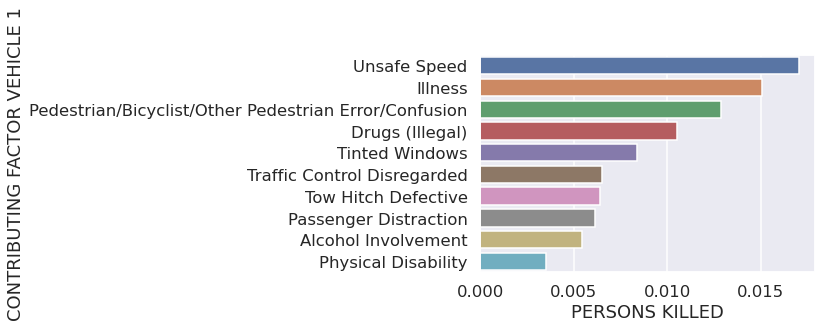

In [22]:
Lethal_factor_1 = total_df.get(['CONTRIBUTING FACTOR VEHICLE 1','PERSONS KILLED']).groupby(by=
     'CONTRIBUTING FACTOR VEHICLE 1').mean().sort_values(by='PERSONS KILLED',ascending=False).reset_index()

sns.barplot(data=Lethal_factor_1.iloc[0:10],x='PERSONS KILLED',y='CONTRIBUTING FACTOR VEHICLE 1',orient='h')

When this same graph is used with the persons injured column instead, we see that the distribution among the top ten contributing factors is more evenly distributed.

<AxesSubplot:xlabel='PERSONS INJURED', ylabel='CONTRIBUTING FACTOR VEHICLE 1'>

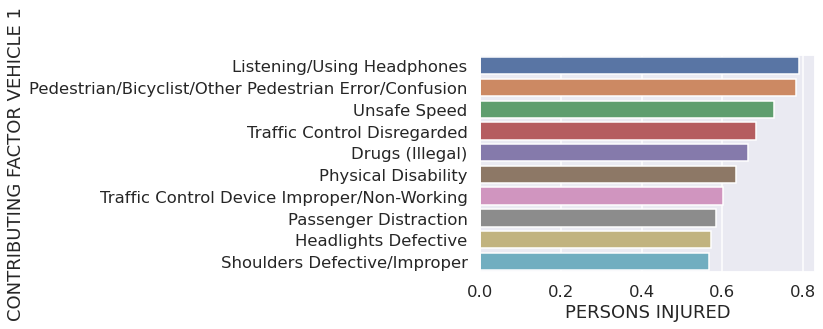

In [23]:
Injury_factor = total_df.get(['CONTRIBUTING FACTOR VEHICLE 1','PERSONS INJURED']).groupby(by=
    'CONTRIBUTING FACTOR VEHICLE 1').mean().sort_values(by='PERSONS INJURED',ascending=False).reset_index()

sns.barplot(data=Injury_factor.iloc[0:10],x='PERSONS INJURED',y='CONTRIBUTING FACTOR VEHICLE 1',orient='h')

While the distribution of contributing factors to injuries and deaths is telling, our ability to analyze it is limited due to them being qualitative values. So, let's create a new column that represents the total number of vehicles involved in an accident for each row. 

In [24]:
total_df['TOTAL CARS'] = total_df[['VEHICLE TYPE CODE 1','VEHICLE TYPE CODE 2','VEHICLE TYPE CODE 3','VEHICLE TYPE CODE 4','VEHICLE TYPE CODE 5']].notnull().sum(axis=1)
#This creates a new data frame with all of the data from df with a column representing the total 

In [25]:
# rename columns without spaces so code for analysis is easier to read and write
total_df.rename(columns = {'PERSONS KILLED':'PERSONS_KILLED','PEDESTRIANS KILLED':"PEDESTRIANS_KILLED", 
                           'MOTORIST KILLED':'MOTORIST_KILLED', 'CYCLIST KILLED':'CYCLIST_KILLED',
                           'TOTAL CARS':'TOTAL_CARS'}, inplace = True) 

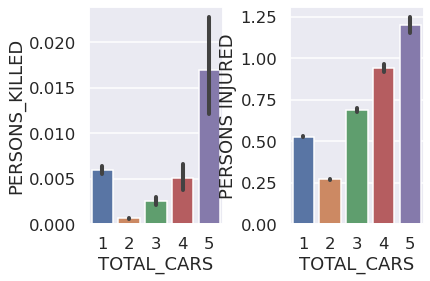

In [26]:
f, axes = plt.subplots(1, 2)
sns.barplot(data=total_df,x='TOTAL_CARS',y='PERSONS_KILLED',ax = axes[0])
sns.barplot(data=total_df,x='TOTAL_CARS',y='PERSONS INJURED',ax = axes[1])
plt.subplots_adjust(wspace=0.5)

When graphed as a bar chart we see a bimodal distribution with peaks at 1 car and 5 cars for both persons killed and injured. These variables appear to have a positive relation from the plotted barcharts. In our data analysis, we'll use linear regression to determine the exact correlation coefficient and see if relation is statistically significant. For now, let's continue plotting barcharts for pedestrians, motorists, and cyclists killed/injured to see if this bimodal distribution is consistent throughout the data.



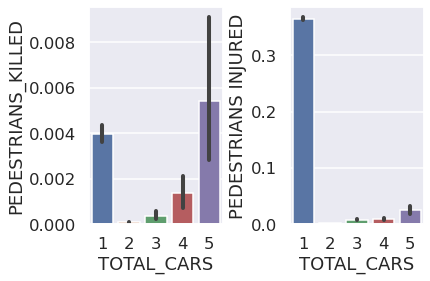

In [27]:
#Barplot for PEDESTRIANS KILLED / INJURED
f, axes = plt.subplots(1, 2)
sns.barplot(data=total_df,x='TOTAL_CARS',y='PEDESTRIANS_KILLED',ax = axes[0])
sns.barplot(data=total_df,x='TOTAL_CARS',y='PEDESTRIANS INJURED',ax = axes[1])
plt.subplots_adjust(wspace=0.5)

If we make the same graph with PEDESTRIANS KILLED instead of PERSONS KILLED, we find that 0.004 of the 0.006, or about 66%, persons killed in one vehicle accidents are pedestrians. This means that the cause of our bimodal distribution is that **pedestrians are more likely to be involved,** as indicated by the PEDESTRIANS INJURED, and thus killed in one-vehicle accidents.

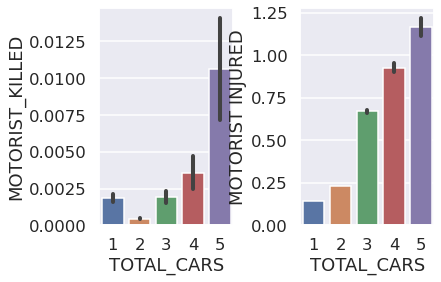

In [28]:
#Barplot for MOTORISTS KILLED / INJURED
f, axes = plt.subplots(1, 2)
sns.barplot(data=total_df,x='TOTAL_CARS',y='MOTORIST_KILLED',ax = axes[0])
sns.barplot(data=total_df,x='TOTAL_CARS',y='MOTORIST INJURED',ax = axes[1])
plt.subplots_adjust(wspace=0.5)

We can see that without pedestrians, the MOTORISTS_KILLED plot has a much stronger positive correlation.

### Fatality Rates by Time Block and Date

We will analyze the fatality rate (the rate of death resulting from crashes) across different time blocks (Night, Morning, Afternoon, and Evening) to identify which time block exhibits a higher fatality rate.

For the date analysis, we will compare the fatality rate with the crash date to determine if there is a particular month with a higher fatality rate.

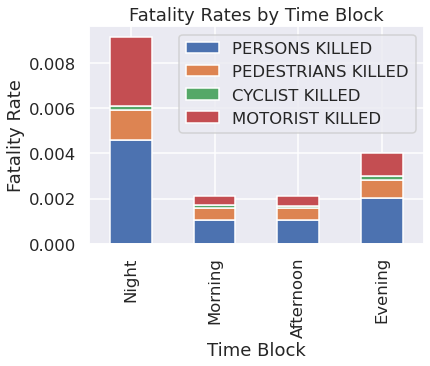

In [29]:
# Adding Time Block column and labeled as Night, Morning, Afternoon, and Evening
df['Time Block'] = pd.cut(df['CRASH TIME'].apply(lambda x: x.hour), bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'])

# Analyzing fatality rates for each time block
fatality_rates_time = df.groupby('Time Block')[['PERSONS KILLED', 'PEDESTRIANS KILLED', 'CYCLIST KILLED', 'MOTORIST KILLED']].mean()

# Visualizing fatality rates
ax = fatality_rates_time.plot(kind='bar', stacked=True, title='Fatality Rates by Time Block')
ax.set_ylabel('Fatality Rate')
ax.set_xlabel('Time Block')
plt.show()


We can see that during the night time (which is 12am to 6am), there is a much higher fatality rate compared to other time blocks. Since it is harder to see in the night, it is reasonable that there is more crashes during the night. This also aligned with our hypothesis.  

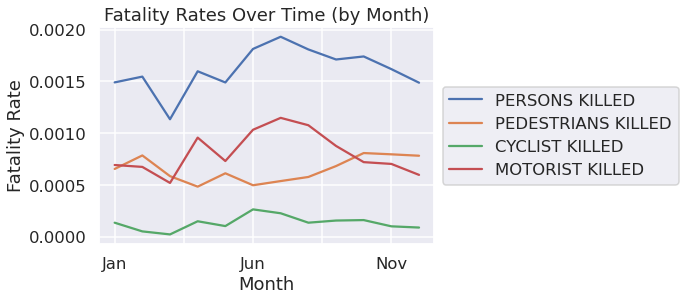

In [30]:
#Now for the date analysis
# Grouping by month and analyzing fatality rates
fatality_rates_month = df.groupby(df['CRASH DATE'].dt.month)[['PERSONS KILLED', 'PEDESTRIANS KILLED', 'CYCLIST KILLED', 'MOTORIST KILLED']].mean()

# Mapping month numbers to month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
fatality_rates_month.index = fatality_rates_month.index.map({i + 1: month_names[i] for i in range(12)})

# Visualizing fatality rates over time (by month)
ax = fatality_rates_month.plot(kind='line', title='Fatality Rates Over Time (by Month)')
ax.set_ylabel('Fatality Rate')
ax.set_xlabel('Month')
# Moving the legend to the right outside of the plot
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Looking at the plot, we can see that there is higher fatality rate during the month of July, which is summer time. Here's some assumption on why this is the case: 
1. Increased Travel: Summer months often see an increase in travel as people take vacations or go on road trips, leading to more vehicles on the road.
2. Weather Conditions: Favorable weather conditions in July may encourage more people to drive, but can also contribute to certain types of accidents, such as those related to increased speed or distractions (hot weather may reduce people's patience).
3. Holiday Celebrations: Independence Day (July 4th) and other celebratory events may involve increased alcohol consumption and gatherings, leading to a higher likelihood of accidents.

### Comparing Fatality Rates between Vehicle Types and Parties Involved

Next, we'll take a look at the specific vehicle types involved in the collisions in our dataset. We want to know if:
1. the type of vehicle(s) involved in a collision has an effect on fatality rates
2. being a motorist, cyclist, or pedestrian in a collision has an effect on fatality rates

We'll tackle Objective 1 first.

Let's start with a general overview barplot that aims to visualize the average number of persons killed by vehicle type.

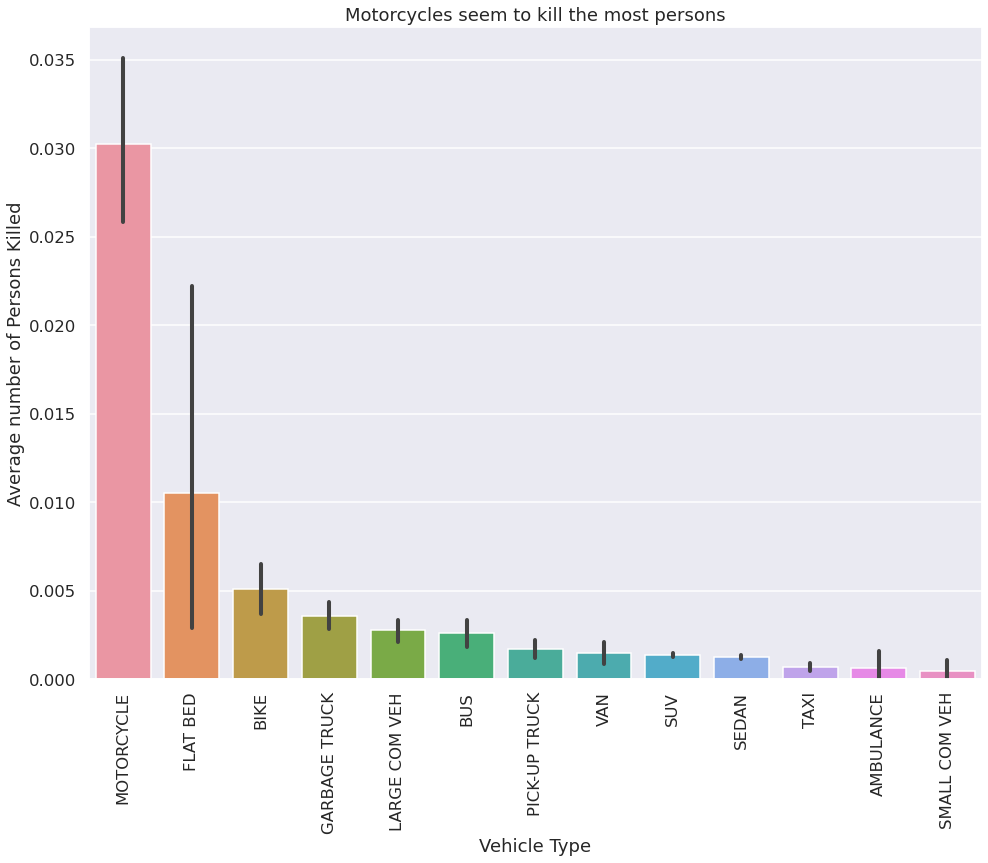

In [31]:
plt.figure(figsize=(16,12))
plotorder1 = df.groupby('VEHICLE TYPE CODE 1')['PERSONS KILLED'].agg('mean').sort_values(ascending=False).index
fatality_rates = sns.barplot(x='VEHICLE TYPE CODE 1', y='PERSONS KILLED', data=df, order=plotorder1)
plt.xlabel('Vehicle Type')
plt.ylabel('Average number of Persons Killed')
plt.title('Motorcycles seem to kill the most persons')
plt.xticks(rotation=90);

As we can see, motorcycles overwhelm the other vehicle types with its average number of persons killed. Second place is the flatbed truck, which is basically another type of pickup truck but more specialized for construction applications, and third place goes to the bike.

This initial graph points us to some preliminary conclusions we might draw:
1. Vehicle type may indeed have an effect on fatality rates. That is, the type of vehicle you're involved with in a crash could predict your likelihood of dying.
2. Previous research indicated that drivers, not cyclers, have higher rates of fatality. The distinct divide between 'MOTORCYCLE' and 'BIKE' average number of persons killed with typical 'SEDAN' and 'SUV' average number of persons killed questions this finding.

However, this obviously doesn't tell us the whole story. Let's take a deeper dive and look into the specific groups involved: Pedestrians, Cyclists, and Motorists.

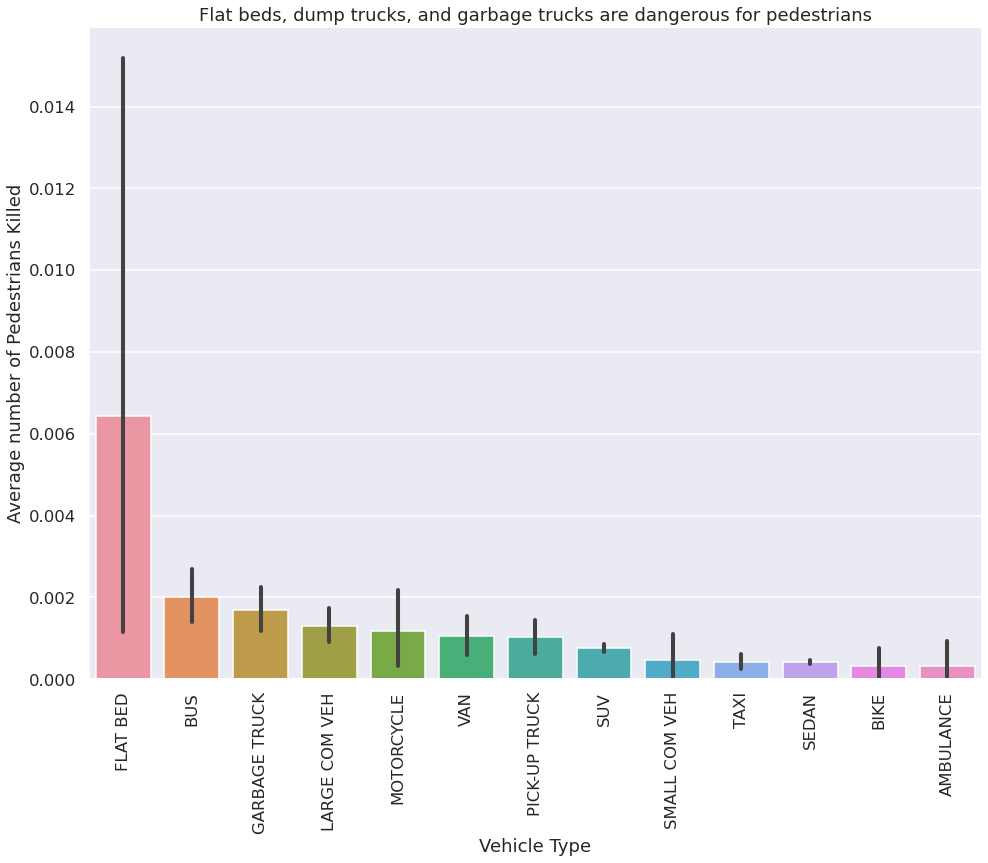

In [32]:
plt.figure(figsize=(16,12))
plotorder2 = df.groupby('VEHICLE TYPE CODE 1')['PEDESTRIANS KILLED'].agg('mean').sort_values(ascending=False).index
fatality_rates = sns.barplot(x='VEHICLE TYPE CODE 1', y='PEDESTRIANS KILLED', data=df, order=plotorder2)
plt.xlabel('Vehicle Type')
plt.ylabel('Average number of Pedestrians Killed')
plt.title('Flat beds, dump trucks, and garbage trucks are dangerous for pedestrians')
plt.xticks(rotation=90);

Wow! It seems that for pedestrians, flat beds, buses, and garbage trucks result in the most average deaths.

If we think about it, this makes sense -- usually, pedestrians are the ones who come into the closest contact with flat beds, buses, and garbage trucks. Flat beds are widely used in construction sites, which we know are very plentiful in New York City -- especially right next to the sidewalk. Garbage trucks being the third-most deadly for pedestrians equally checks out, as they usually are parked next to residential buildings to do their duties.

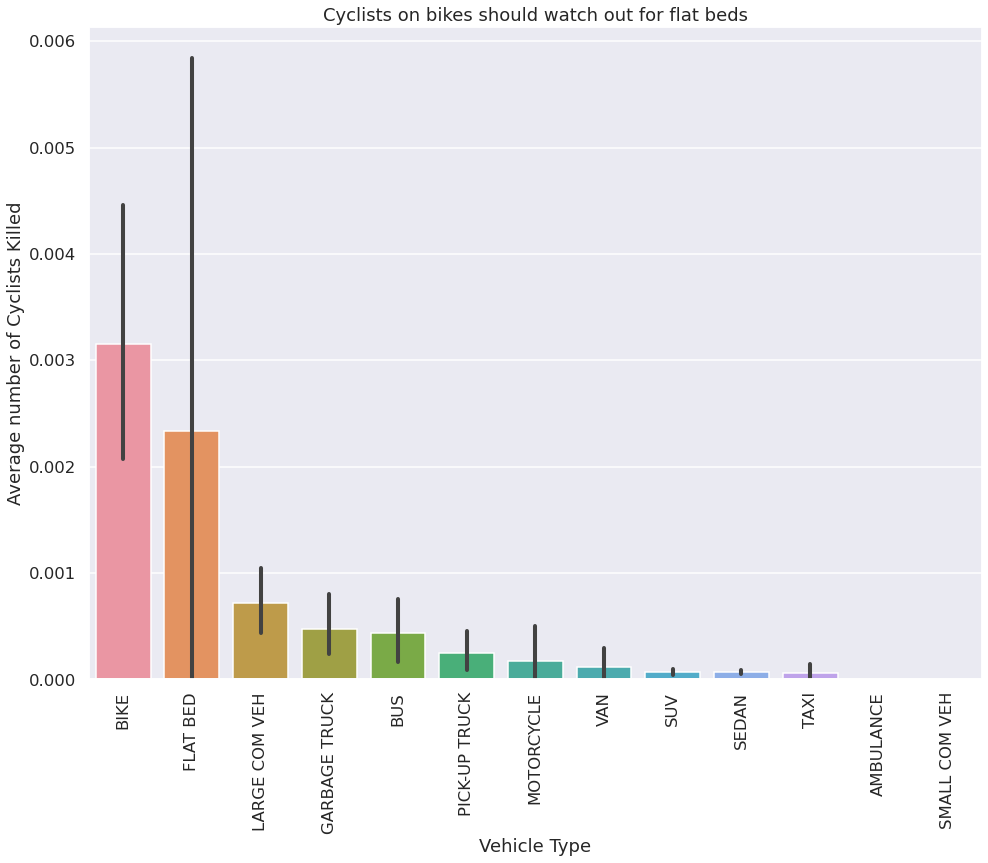

In [33]:
plt.figure(figsize=(16,12))
plotorder2 = df.groupby('VEHICLE TYPE CODE 1')['CYCLIST KILLED'].agg('mean').sort_values(ascending=False).index
fatality_rates = sns.barplot(x='VEHICLE TYPE CODE 1', y='CYCLIST KILLED', data=df, order=plotorder2)
plt.xlabel('Vehicle Type')
plt.ylabel('Average number of Cyclists Killed')
plt.title('Cyclists on bikes should watch out for flat beds')
plt.xticks(rotation=90);

For cyclists, the graph is quite predictable.

Cyclists obviously ride bikes, which aligns with their average number of cyclists killed at #1. Bikes are also quite primitive in terms of safety features -- most have none at all, which may also play a factor.

One thing to note is the return of the flat bed. Given that cyclists sometimes travel on sidewalks and come into contact with construction sites, the flat bed being third-most deadly for cyclists checks out as well.

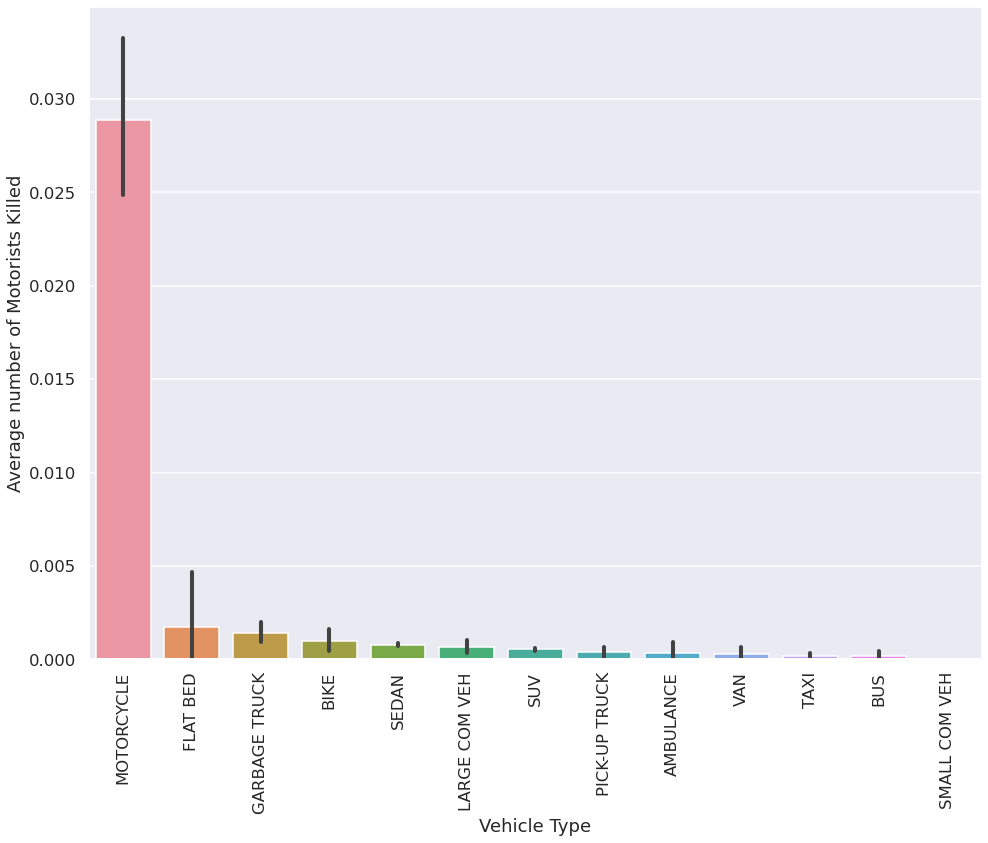

In [34]:
plt.figure(figsize=(16,12))
plotorder2 = df.groupby('VEHICLE TYPE CODE 1')['MOTORIST KILLED'].agg('mean').sort_values(ascending=False).index
fatality_rates = sns.barplot(x='VEHICLE TYPE CODE 1', y='MOTORIST KILLED', data=df, order=plotorder2)
plt.xlabel('Vehicle Type')
plt.ylabel('Average number of Motorists Killed')
plt.xticks(rotation=90);

The 'Motorist' category indicates the actual vehicle occupants -- i.e, the person operating the vehicle in question. Bikes and e-bikes are not included in this as they are not powered by an engine.

Looking at this graph, we see an overwhelming dominance by motorcycles for average # of motorists killed. But why motorcycles?

Motorcycles lack common safety features found in typical automobiles -- seatbelts, airbags, safety technology such as blind-spot monitoring and automatic braking, and perhaps the most obvious: the lack of a safety cage surrounding the operator.

They ride in the open air -- and thus it makes sense that they're at the most risk of fatality in a collision. There's nothing to protect them!

However, due to how rare commercial vehicles and motorcycles are on the road they are not very common in our dataset. This results in them having **very large error bars and thus we would not be very certain in any analysis based on that data.** As a result, we will not be including them in our final analysis for most lethal factors in accidents. Instead, we will be focusing on other vehicle types which have much smaller error bars, such as sedans and SUVs. 


### Comparing the role of the most popular vehicle types and contribution factors to fatalities and injuries

The key idea in this section of the EDA is to try and compare the most common vehicle types and contribution factors to each other and see the role they play in fatalities. We will also carry out some correlation analysis to try and see if we are able to find clear correlation between certain vehicle types/contribution factors and fatalities. 

Now that we have one-hot encoded the data to be able to find more specific correlations between vehicle types and persons killed, let us do a quick analysis on the effect of sedans on average persons killed, as well as overall fatalities. 

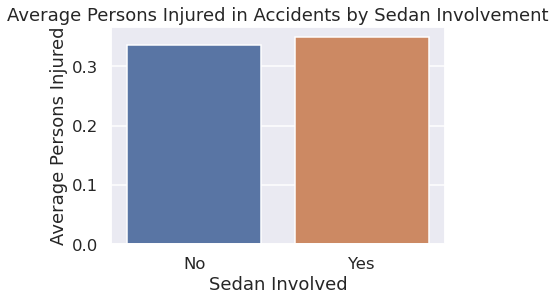

In [35]:
# Example visualization: Bar plot for average 'PERSONS INJURED' by sedan involvement
sedan_injured_avg = one_hot_encoded_df.groupby('VEHICLE TYPE CODE 1_SEDAN')['PERSONS INJURED'].mean().reset_index()
sns.barplot(x='VEHICLE TYPE CODE 1_SEDAN', y='PERSONS INJURED', data=sedan_injured_avg)
plt.title('Average Persons Injured in Accidents by Sedan Involvement')
plt.xlabel('Sedan Involved')
plt.ylabel('Average Persons Injured')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

What is very interesting is that, based on the scale of the Y-axis, it is almost impossible to see fatalities > 0. This is because accidents with no fatalities is in the range of hundreds of thousands or so while fatalities involving sedans are less than 1,000. 

Let's improve this visualization by only including accidents with at least one fatality.

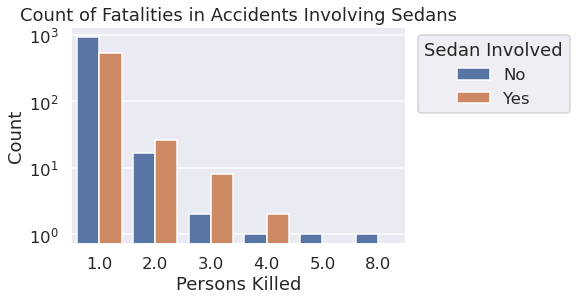

In [36]:
fatalities_df = one_hot_encoded_df[one_hot_encoded_df['PERSONS KILLED']>=1]

ax = sns.countplot(x='PERSONS KILLED', data=fatalities_df, hue='VEHICLE TYPE CODE 1_SEDAN')
plt.title('Count of Fatalities in Accidents Involving Sedans')
plt.xlabel('Persons Killed')
plt.ylabel('Count')

# Move the legend to the side of the plot
plt.legend(title='Sedan Involved', labels=['No', 'Yes'], bbox_to_anchor=(1.01, 1), loc='upper left')

# Set the Y axis to a logarithmic scale
ax.set_yscale('log')

plt.show()


This is much more indicative of the involvement of sedans in 'fatal' accidents. Now, let us do the same for SUVs -- the key idea here is to see the proportions of crashes involving common vehicle types and their fatality rates.

In [37]:
#filtering columns for SUVS
suv_columns = [column for column in one_hot_encoded_df.columns if 'SUV' in column]
suv_columns

['VEHICLE TYPE CODE 1_SUV']

Now, let us do the same for SUVs. The idea is that the most common vehicles for personal travel are sedans and SUVs. So, based on this dataset, are we able to categorize one of them as safer, based on how often we see fatalities in accidents involving them? Let us now explore Sedans vs. SUVs.

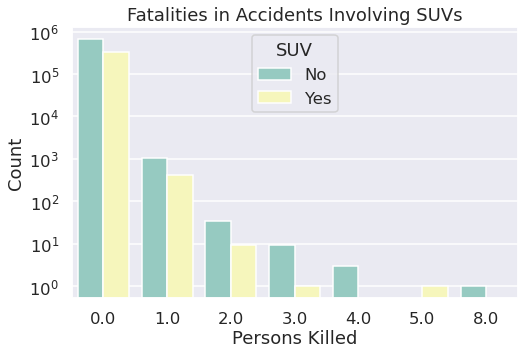

In [38]:
plt.figure(figsize=(8, 5))

# Create the countplot
ax = sns.countplot(data=one_hot_encoded_df, x='PERSONS KILLED', hue='VEHICLE TYPE CODE 1_SUV', palette='Set3')
plt.title('Fatalities in Accidents Involving SUVs')
plt.xlabel('Persons Killed')
plt.ylabel('Count')
plt.legend(title='SUV', labels=['No', 'Yes'])

# Set the Y axis to a logarithmic scale
ax.set_yscale('log')

plt.show()

Similarly, by filtering the dataframe to include accidents with only at least one fatality, we are getting to see the correlation between SUV involvement and fatality levels. This is an interesting insight for our dataset. Any plots with total accidents will not allow us to explore fatalities, given the sheer difference in the number of accidents with 0 fatalities and > 0 fatalities. 

In the future we will use the fatalities_df dataframe so that our visualizations are able to more clearly emphasize the relationship between vehicle types and contributing factors specifically to fatalities. 

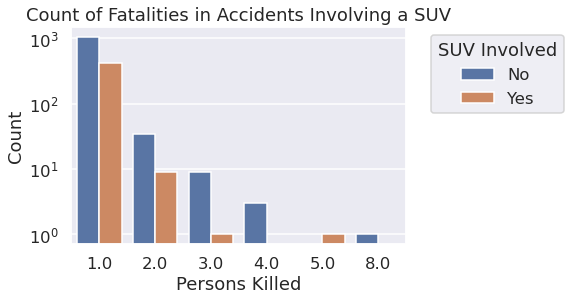

In [39]:
ax = sns.countplot(x='PERSONS KILLED', data=fatalities_df, hue='VEHICLE TYPE CODE 1_SUV')
plt.title('Count of Fatalities in Accidents Involving a SUV')
plt.xlabel('Persons Killed')
plt.ylabel('Count')

# Move the legend off the graph
plt.legend(title='SUV Involved', labels=['No', 'Yes'], bbox_to_anchor=(1.05, 1), loc='upper left')

# Set the Y axis to a logarithmic scale
ax.set_yscale('log')

plt.show()

It is interesting to see that the proportion of accidents involving SUVs with 1 fatality is less than that of sedans. Although the proportions are close, it is clear that SUVs have a lower involvement in fatal accidents or that people survive serious accidents in SUVs at a higher rate than they do in Sedans. This could be attributed to SUVs being larger, possibly safer.

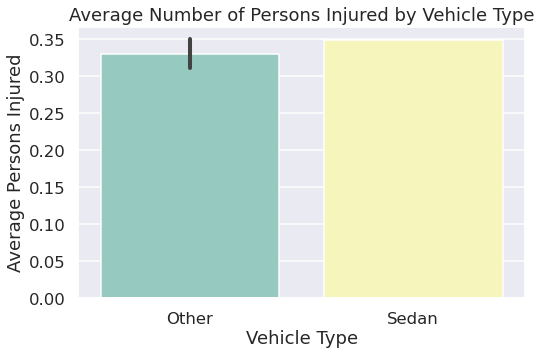

In [40]:
# Aggregating the average number of persons injured by vehicle type
vehicle_injuries = one_hot_encoded_df[['VEHICLE TYPE CODE 1_SEDAN', 'VEHICLE TYPE CODE 1_SUV', 'PERSONS INJURED']].groupby(['VEHICLE TYPE CODE 1_SEDAN', 'VEHICLE TYPE CODE 1_SUV']).mean().reset_index()

# Visualizing the average number of persons injured by vehicle type
plt.figure(figsize=(8, 5))
sns.barplot(data=vehicle_injuries, x='VEHICLE TYPE CODE 1_SEDAN', y='PERSONS INJURED', palette='Set3')
plt.title('Average Number of Persons Injured by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Persons Injured')
plt.xticks(ticks=[0, 1], labels=['Other', 'Sedan'])
plt.show()


Sedans seem to have a higher average injury rate as compared to other vehicle types as well. This is interesting to see and coincides with our earlier exploration that SUVs have a lower fatality rate as compared to sedans as well.

Now let us similarly explore some common contribution factors and see how the fatality and injury rates differ for these. Let us start with driver inattention, the most common contributing factor that we see in our dataset.

As seen earlier wihtout filtering the dataset for at least 1 fatality, the visualizations do not have as much value. The scale of the Y-axis is too big since nearly a million accidents have seen no fatalities and fatalities are in the range of only 1,000. Let us filter this result to include crashes with at least one fatality.  

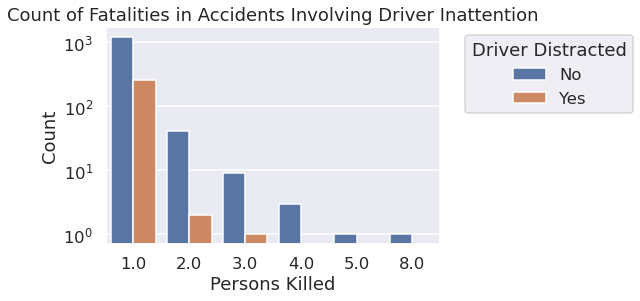

In [41]:
ax = sns.countplot(x='PERSONS KILLED', data=fatalities_df, hue='CONTRIBUTING FACTOR VEHICLE 1_Driver Inattention/Distraction')
plt.title('Count of Fatalities in Accidents Involving Driver Inattention')
plt.xlabel('Persons Killed')
plt.ylabel('Count')

# Move the legend off the graph
plt.legend(title='Driver Distracted', labels=['No', 'Yes'], bbox_to_anchor=(1.05, 1), loc='upper left')

# Set the Y axis to a logarithmic scale
ax.set_yscale('log')

plt.show()


This is quite interesting to see. Although driver inattention was the reason for over 300,000 accidents, only a small proportion in the range of 300 were fatal. This does make sense since, in general, most accidents are not fatal. However, it is essential to note that of the accidents that caused 1 fatality, 1/5 of those were caused by driver inattention.

### Interesting Insight
Now let us explore the correlation between SUVs as a vehicle type and persons injured and killed. For this matrix we will use only fatal accidents from the dataset. It is important to realise that the sheer scale of accidents with no fatalities will make showing correlation without filtering for accidents with deaths >= 1, very difficult. This is why we see such low correlation between these values. As the correlation of injuries to fatalities is so low, this does not seem entirely logical. 

Let us check the correlation on all accidents excluding non fatal accidents. 

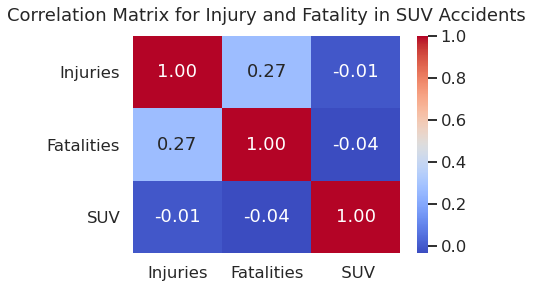

In [42]:
# Assuming 'suv_columns' contains the relevant SUV column, and you want to analyze it alongside 'PERSONS INJURED' and 'PERSONS KILLED'
selected_columns = ['PERSONS INJURED', 'PERSONS KILLED'] + suv_columns # Add other numeric columns as needed

# Calculating the correlation matrix for the selected variables
correlation_matrix = fatalities_df[selected_columns].corr()

# Visualizing the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            xticklabels=['Injuries', 'Fatalities', ' SUV'],
            yticklabels=['Injuries', 'Fatalities', 'SUV'])
plt.title('Correlation Matrix for Injury and Fatality in SUV Accidents',pad=15)
plt.show()

Now we see some more correlation between persons injured and persons killed, yet we cannot derive much correlation between SUVs and deaths. However, the earlier data exploration showed us a clearer picture where we saw the proportion of fatal accidents involving SUV's versus other vehicle types. The near 0 (slightly negative) correlation might be due to the fact that overall the number of fatal accidents in relation to fatalities is still very small since hundreds of thousands of accidents had no fatalities. And of the few that did have fatalities, SUVs were involved in only 400 or so accidents. 

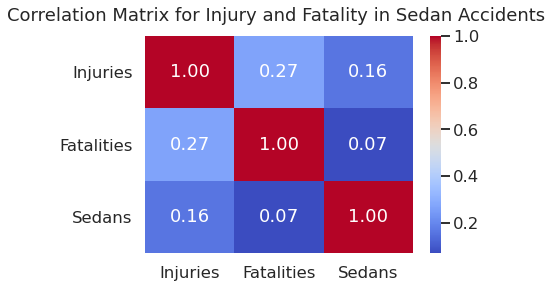

In [43]:
# Assuming 'suv_columns' contains the relevant SUV column, and you want to analyze it alongside 'PERSONS INJURED' and 'PERSONS KILLED'
selected_columns = ['PERSONS INJURED', 'PERSONS KILLED','VEHICLE TYPE CODE 1_SEDAN'] # Add other numeric columns as needed

# Calculating the correlation matrix for the selected variables
correlation_matrix = fatalities_df[selected_columns].corr()

# Visualizing the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            xticklabels=['Injuries', 'Fatalities', 'Sedans'],
            yticklabels=['Injuries', 'Fatalities', 'Sedans'])
plt.title('Correlation Matrix for Injury and Fatality in Sedan Accidents ', pad=15)
plt.show()

This correlation matrix is a lot more intuitive. For instance, we immediately see a 0.27 correlation between people killed and injured, since the intensity of an accident will determine the injuries and deaths across individuals. However, we see a 0.16 correlation between persons killed and sedans, showing that sedans are correlated to a non-trivial extent to deaths, which would make sense since they are one of the most common vehicles seen on the roads. Despite the many varieties of vehicle types, there were enough accidents involving sedans to show correlation. 

# Data Analysis and Results

## Analysis by Fatalities and Total Vehicles

In [44]:
outcome, predictors = patsy.dmatrices('PERSONS_KILLED ~ TOTAL_CARS', total_df)
model = sm.OLS(outcome, predictors)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         PERSONS_KILLED   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     106.0
Date:                Thu, 21 Mar 2024   Prob (F-statistic):           7.58e-25
Time:                        04:02:05   Log-Likelihood:             1.7384e+06
No. Observations:             1011721   AIC:                        -3.477e+06
Df Residuals:                 1011719   BIC:                        -3.477e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0033      0.000     19.808      0.0

Our OLS regression results show these two variables have a slighlty negative correlation coefficient of -0.0008 and is statistically significant with a p-value of 0.000, though it is probably just a really small number that the code rounded to 0.000. However, this analysis was done with the total number of persons killed. Let's check pedestrians, motorists, and cyclists killed to see if any of those groups have a different relationship with total vehicles -- rerunning the analysis for specific parties involved may result in unique, interesting findings.

In [45]:
# OLS model for PEDESTRIANS KILLED vs. TOTAL CARS
outcome, predictors = patsy.dmatrices('PEDESTRIANS_KILLED ~ TOTAL_CARS', total_df)
model = sm.OLS(outcome, predictors)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     PEDESTRIANS_KILLED   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     740.9
Date:                Thu, 21 Mar 2024   Prob (F-statistic):          4.31e-163
Time:                        04:02:07   Log-Likelihood:             2.2288e+06
No. Observations:             1011731   AIC:                        -4.458e+06
Df Residuals:                 1011729   BIC:                        -4.458e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0033      0.000     32.859      0.0

In [46]:
# OLS model for MOTORISTS KILLED vs. TOTAL CARS
outcome, predictors = patsy.dmatrices('MOTORIST_KILLED ~ TOTAL_CARS', total_df)
model = sm.OLS(outcome, predictors)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        MOTORIST_KILLED   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     55.74
Date:                Thu, 21 Mar 2024   Prob (F-statistic):           8.29e-14
Time:                        04:02:08   Log-Likelihood:             2.0691e+06
No. Observations:             1011731   AIC:                        -4.138e+06
Df Residuals:                 1011729   BIC:                        -4.138e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -5.06e-05      0.000     -0.424      0.6

In [47]:
# OLS model for CYCLISTS KILLED vs. TOTAL CARS
outcome, predictors = patsy.dmatrices('CYCLIST_KILLED ~ TOTAL_CARS', total_df)
model = sm.OLS(outcome, predictors)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         CYCLIST_KILLED   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     15.03
Date:                Thu, 21 Mar 2024   Prob (F-statistic):           0.000106
Time:                        04:02:09   Log-Likelihood:             3.0451e+06
No. Observations:             1011731   AIC:                        -6.090e+06
Df Residuals:                 1011729   BIC:                        -6.090e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.967e-05   4.54e-05     -0.653      0.5

For all three groups we see that they all have very small correlation coefficients which are statistically significant. However, we can see a trend when the data is presented graphically, which we did in our EDA section.

Based off the trends we can see graphically and the bimodal distribution, we believe this warrants further study by continuing our analysis on the accidents in which two or more vehicles were involved and no longer focusing on the accidents where only one vehicle was involved. This is because accidents where only one vehicle is involved will more than likely also involve a pedestrian or cyclist, in which the chance of a them being killed becomes very high, skewing our data. Thus, by focusing on accidents where two or more vehicles are involved, we can find if the positive relation seen in our barcharts is statistically significant for accidents where the chance of a fatality is much lower.

In [48]:
two_or_more = total_df[total_df["TOTAL_CARS"] >= 2]

In [49]:
# OLS model for PERSONS KILLED vs. TOTAL CARS with only two or more vehicles involved
outcome, predictors = patsy.dmatrices('PERSONS_KILLED ~ TOTAL_CARS', two_or_more)
model = sm.OLS(outcome, predictors)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         PERSONS_KILLED   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1095.
Date:                Thu, 21 Mar 2024   Prob (F-statistic):          4.64e-240
Time:                        04:02:11   Log-Likelihood:             1.7186e+06
No. Observations:              874778   AIC:                        -3.437e+06
Df Residuals:                  874776   BIC:                        -3.437e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0054      0.000    -27.642      0.0

In [50]:
# OLS model for PEDESTRIANS KILLED vs. TOTAL CARS with only two or more vehicles involved
outcome, predictors = patsy.dmatrices('PEDESTRIANS_KILLED ~ TOTAL_CARS', two_or_more)
model = sm.OLS(outcome, predictors)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     PEDESTRIANS_KILLED   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     493.1
Date:                Thu, 21 Mar 2024   Prob (F-statistic):          3.17e-109
Time:                        04:02:12   Log-Likelihood:             2.4868e+06
No. Observations:              874780   AIC:                        -4.974e+06
Df Residuals:                  874778   BIC:                        -4.974e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0016   8.14e-05    -19.970      0.0

In [51]:
# OLS model for MOTORISTS KILLED vs. TOTAL CARS with only two or more vehicles involved
outcome, predictors = patsy.dmatrices('MOTORIST_KILLED ~ TOTAL_CARS', two_or_more)
model = sm.OLS(outcome, predictors)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        MOTORIST_KILLED   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     782.3
Date:                Thu, 21 Mar 2024   Prob (F-statistic):          4.64e-172
Time:                        04:02:13   Log-Likelihood:             1.9060e+06
No. Observations:              874780   AIC:                        -3.812e+06
Df Residuals:                  874778   BIC:                        -3.812e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0037      0.000    -23.416      0.0

In [52]:
# OLS model for CYCLISTS KILLED vs. TOTAL CARS with only two or more vehicles involved
outcome, predictors = patsy.dmatrices('CYCLIST_KILLED ~ TOTAL_CARS', two_or_more)
model = sm.OLS(outcome, predictors)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         CYCLIST_KILLED   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     15.22
Date:                Thu, 21 Mar 2024   Prob (F-statistic):           9.57e-05
Time:                        04:02:15   Log-Likelihood:             2.6107e+06
No. Observations:              874780   AIC:                        -5.221e+06
Df Residuals:                  874778   BIC:                        -5.221e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0001   7.07e-05     -1.747      0.0

Without our data being skewed by single accident collisions involving a vehicle and non-motorist, we can see that the OLS regression results are significantly different. When we remove single-car accidents, we see a far larger correlation coefficient between fatalities and total number of cars especially with motorists. With this, we can conclude that fatalities among motorists (and to a lesser degree pedestrians) are strongly correlated with the total number of vehicles in the accident.

## Which vehicle types are the most 'dangerous' ?

In [53]:
dictionary ={}
for s in fatalities_df.columns:
    if 'VEHICLE TYPE' in s:
        dictionary[s] = len(fatalities_df[(fatalities_df[s]==True)])
        
max_key_1 = max(dictionary, key=lambda k: dictionary[k])

print(max_key_1, ': ',dictionary[max_key_1])

VEHICLE TYPE CODE 1_SEDAN :  574


From above, it is clear that sedans and SUVs have the highest numbers of accidents which are fatal. This makes sense for a number of reasons, one they are the most common vehicles and they are used for personal use and are not driven by trained drivers. In the EDA section we already went over how these vehicles compare to other vehicle types when it comes to fatalities in accidents and it is clear that when it comes to accidents with 1-2 fatalities we see a higher proportion of SUVs and Sedans being involved. 

Now let us explore the most 'dangerous' contributing factors. By 'dangerous', we mean those that caused the highest number of fatal accidents in this dataset.

## Which contributing factors cause the most fatal accidents?


In [54]:
dictionary_2 ={}
for s in fatalities_df.columns:
    if 'CONTRIBUTING FACTOR' in s:
        dictionary_2[s] = len(fatalities_df[(fatalities_df[s]==True)])
dictionary_2
max_key = max(dictionary_2, key=lambda k: dictionary_2[k])
print(max_key, ': ',dictionary_2[max_key])


CONTRIBUTING FACTOR VEHICLE 1_Unsafe Speed :  296


It is quite clear that speeding and driver Inattention are the most common contributing factors to fatal accidents. Both of these seem logical. At higher speeds, accidents are more intense, leading to higher possibility of injury or death. Similarly, driver inattention at stop signs and Intersections can lead to serious accidents, amongst many other situations where inattention could cause a serious collision. Moreover, the use of mobile phones while driving has become a common occurrence and can easily distract a driver.

## What time of day is most dangerous?

As observed earlier the most dangerous time of day is 12AM (midnight) to 6AM. 

We have now found all 3: Vehicle Types, Contributing Factor and Time of Day

Our findings are fairly in line with our hypothesis about the vehicle type and contributing factors playing a big role in fatality. Moreover, we also found that the most commonly driven vehicles are the ones most frequently having fatal accidents, which makes sense. Additionally, the night being the most dangerous can explained by low visibility and drunk driving to some extent. 

# Ethics & Privacy

Since our dataset contains information about fatalities from crashes, families and loved ones of people killed in crashes may not want their late loved one's crash data to be used. Our group is aware of this and will discard any names or any other identifiers that may be present in our dataset to keep the data completely anonymous.

Our dataset may contain some biases. For one, the dataset only measures car crashes in New York City. New York City has a very widely used public transportation system. This allows people of lower socioeconomic status to commute without operating their own motorized vehicles. Thus, the crash data most likely only pertains to those of the middle to upper-middle class. Our group is aware that this does not reflect the demographic of all big cities. Also, there may be a lack of data in the case of hit-and-runs since these incidents sometimes go unreported.

Our group hopes that by presenting the analyses we find, we can make a positive impact by decreasing the amount of crashes and/or fatalities that occur. For example, if certain vehicle types have a high fatality rate, car manufacturers may change the way they build these types.

# Discussion and Conclusion

In this project, we focused on analyzing factors that seemed to be largely missing from other works of research that we found while researching our project. The main factors we focused on were vehicle type, contributing factor, total vehicle count, and time, which we used to determine the most lethal combination of factors.

When it comes to vehicle type, we found that motorcycles and commercial vehicles have the highest fatality rates, which does make sense as motorcycle riders are the most exposed out of all motorists and commercial vehicles are unwieldy and heavy, making them dangerous to other motorists and pedestrians. However, due to how uncommon these vehicles are on the road and in our dataset, we found that they have very large margins of error, meaning we cannot make any claims with certainty. So we decided to focus on vehicle types with lower margins of error, such as SUVs and sedans. With heatmaps, we found that sedans were positively correlated with both injuries and fatalities, while SUVs were negatively correlated with injuries and fatalities. This indicates that SUVs likely have a good balance between being large enough to store more safety features and strong enough to protect passengers while being wieldy enough for the driver to respond to various driving conditions.

Using OLS regression, we initially found that there were very small or sometimes negative correlation coefficients between fatalities and the total number of vehicles in accidents. But our graphs showed that fatalities relative to the total number of vehicles were bimodal due to pedestrians being more likely to be involved and killed in single-vehicle accidents. When we sliced our data frame for two or more vehicle accidents, we found significantly larger correlation coefficients, especially among motorists. Meaning fatalities are high in one-vehicle accidents due to higher pedestrian involvement, low in two-vehicle accidents, but increase as more vehicles are involved.

The analysis of time and date factors in relation to fatality rates within motorist accidents offers valuable insights into the multifaceted dynamics of urban transportation safety. Firstly, the observation of higher fatality rates during nighttime hours underscores the inherent risks associated with reduced visibility, driver fatigue, and the increased likelihood of impaired driving. These findings corroborate existing research, such as the National Safety Council's emphasis on the dangers of driving at night, highlighting the critical need for targeted interventions to mitigate these risks. Similarly, the spike in fatality rates during the month of July provides further insights into the seasonal variations and external factors influencing road safety. Addressing these challenges requires a multifaceted approach, including enhanced traffic management strategies, public safety campaigns promoting responsible driving behaviors, and targeted enforcement efforts during peak travel periods.

With this analysis, we can say for certain that those driving sedans at night, during July, at unsafe speeds, experience and inflict the highest fatalities with one-vehicle accident being more fatal to pedestrians and the number of vehicles being positively correlated with fatalities with two or more vehicles. With significantly less certainty, due to a lack of data and large error bars, we can say that motorcycles and commercial vehicles driving under those same conditions experience and inflict significantly higher fatalities than sedans.

We think it is clear that there are trends in vehicle types, contributing factors, and time of day. Sedans and SUVs combined with speeding/driver distraction and night driving are the most frequently seen in fatal accidents. Our hypothesis was, to some extent, close to the conclusion we reached. Time of Day and vehicles involved played some role in fatality rates. This was shown in the EDA where specific vehicle types were compared to all others to show higher average fatalities. Moreover, we also were able to clearly categorize a time block from 12 PM to 6 AM as most likely to have fatal accidents in line with our initial hypothesis. Due to the nature of the data, where a very large part of the dataset had no fatalities in accidents and the numerous categorical variables for vehicle type and contributing factors, studying accidents specifically with pedestrian deaths would not have been as statistically significant to make broader claims; hence we focused on PERSONS KILLED / INJURED to allow for more generalizability.

### Limitations to Analysis: 

1. Accidents are inherently difficult to examine, accidents are usually layered incidents with various contributing factors and individuals inolved. They are very difficult to quantify and hard to pinpoint a specific reason because more often than not, there are multiple reasons for it. 

2. Our dataset being from New York City, which is one of the most congested places in the world, may not be representative of the majority of driving locations in the world and is likely skewed due to the population density of New York City. 

3. The lack of data for a majority of our multi-vehicle accidents made it challenging to be able to classify accidents based on each vehicle's actions involved, and took away some of the insights we could have generated.

4. Some of our bar charts indicated that motorcycles and flat beds are highly correlated to fatalities, however, due to the lack of data surrounding motorcycles and flat beds we were unable to make any claims with statistical certainty since these graphs had large error bars. If we had more data about these specific vehicle types and datasets in general and included them, it would be helpful to understand the frequency of accidents in such vehicles. 

5. Throughout the study it was observed that even as we were researching this topic, we had biases like a majority of people have a certain view of which vehicles are more dangerous and what causes crashes. However, we did our best to rely on the data and not give into those preconceived notions. 


# Team Contributions

Liopold Chen: Contribute to time and date analysis for EDA, Discussion and Conclusion. Also participate the process of research question formulation, dataset analysis, data cleaning, and hypothesis development.

Vivin Vinil: Wrote the hypothesis in the project proposal, made multiple graphs for the EDA section (correlation matrix/averge proportions). Helped in data pre processing and one hot encoded the dataset I also wrote the abstract and parts of the discussion and conclusion section.

Travis Gillespie: Made graphs for total car and contributing factors part of the EDA, the OLS section of data analysis, and worked on the discussion and conclusion section. Work together on research question, dataset and data cleaning.

AJ Sangle: Acquired dataset, wrote background and prior work section, cleaned data by standardizing and filtering "VEHICLE TYPE CODE 1" column for analysis, contributed "vehicle type/parties involved" section of EDA, wrote script for and edited video.

Nikhil Patel: Wrote ethics and privacy, helped to clean and standardize data, coordinated team, looked over assignments and made todo lists, helped do OLS regression.